# Project – Resume Classification

**Business objective**- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [16]:
final_data=pd.read_csv("final_resumes_dataset.csv")

In [17]:
final_data.head()

,File Name,Text Data,class
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes


In [18]:
final_data

,File Name,Text Data,class
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes
...,...,...,...
74,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,react_dev
75,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,react_dev
76,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_dev
77,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_dev


In [19]:
final_data = final_data.rename(columns={'class': 'Category'})

In [20]:
final_data["Category"].value_counts()

react_dev          24
workday_resumes    21
peoplesoft         20
SQL_Developer      14
Name: Category, dtype: int64

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

In [24]:
skills_list = [
    "hr", "talent management", "payroll", "benefits", "time tracking",
    "recruiting", "performance management", "reporting", "integration",
    "configuration", "business processes", "security", "financials", "hcm",
    "supply chain management", "enterprise performance management",
    "project portfolio management", "crm", "enterprise learning management",
    "enterprise service automation", "enterprise performance management",
    "reporting", "integration", "configuration", "business processes",
    "security", "sql", "database design", "database administration",
    "data modeling", "database programming", "query optimization",
    "performance tuning", "data warehousing", "data analysis", "reporting",
    "react", "javascript", "html", "css", "front-end development", "ui design",
    "responsive web design", "web development", "software development", "git",
    "peoplesoft", "absence management", "benefits administration", "core hr",
    "eperformance", "payroll processing", "recruiting solutions",
    "time and labor management", "workday", "human capital management",
    "payroll management", "benefits administration", "talent management",
    "recruitment management", "time and attendance management", "hr analytics",
    "hr operations", "hr policies", "hr regulations", "hr systems", "hris",
    "hrms", "performance metrics", "sql server management studio",
    "sql server integration services", "sql server reporting services",
    "sql server analysis services", "data analysis", "data mining",
    "data modeling", "data warehousing", "hardworking", "adaptive",
    "fast learner", "server", "hcm", "support", "developer", "testing",
    "oracle", "domain", "production", "query", "coding", "eib", "fscm",
    "consultant", "xml", "reporting", "javascript", "xslt", "troubleshooting",
    "peopletools", "hrms", "linux", "monitoring", "operations", "admin",
    "analysis", "configuring", "bootstrap", "communication", "maintenance"
]

In [25]:

def clean_resume_text(resume_text):
    """
    This function takes in a string of text (resume) as input and returns a cleaned version of the text.
    """
    # Convert to lowercase
    resume_text = resume_text.lower()
    
    # Remove numbers and special characters
    resume_text = re.sub('[^a-zA-Z]', ' ', resume_text)
    
    # Remove punctuation
    resume_text = resume_text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    resume_text = ' '.join(resume_text.split())
    
    # Remove words with two or one letter
    resume_text = ' '.join(word for word in resume_text.split() if len(word) > 2)
    
    # Remove stop words
    resume_text = ' '.join(word for word in resume_text.split() if word not in stopwords)
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    resume_text = ' '.join(lemmatizer.lemmatize(word) for word in resume_text.split())
    
    return resume_text


In [27]:
final_data["clean_text"] = final_data["Text Data"].apply(clean_resume_text)

In [28]:
final_data.head()

,File Name,Text Data,Category,clean_text
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes,harikrishna akula summary year experience arou...
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [29]:
#Now we will try to find the most common word present in dataset column clean_text

In [30]:
import string

In [31]:
from collections import Counter

In [32]:
all_resume_text = ' '.join(final_data["clean_text"])

In [33]:
all_resume_text

'chinna subbarayudu dob march nationality indian profile summary around year experience developing implementation erp technology using workday hcm etl informatica technology year experience workday integration consultant involved maintenance implementation experience phase workday like requirement gathering analysis design development testing hand experience inbound outbound integration using core connector workday studio managing business process working eib report writer developed maintained custom report type advanced matrix composite using report writer tool involved transformation xml xslt presenting data different web service building workday integration eib calculated field custom report writing xslt transformation code developed testing strategy validation scenario along project scope requirement document prioritizing reproducing verifying bug fix different workday integration knowledge xml soap web service rest web service experienced using tool soap xml exchanger involved wri

In [34]:
all_words = all_resume_text.split()

In [35]:
word_counts = Counter(all_words)

In [36]:
top_words = word_counts.most_common(40)

In [37]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
xff: 1531
experience: 603
application: 536
server: 512
report: 481
peoplesoft: 453
workday: 431
using: 390
project: 381
integration: 372
data: 332
database: 303
process: 300
system: 282
sql: 280
business: 276
web: 251
tool: 240
client: 222
worked: 220
knowledge: 219
role: 215
service: 210
requirement: 202
environment: 202
involved: 188
team: 186
skill: 185
hcm: 182
support: 182
like: 177
technology: 176
good: 169
development: 167
creating: 164
design: 163
working: 163
user: 162
technical: 160
people: 160


In [38]:
#we will remove these word are not relevent are noise in the dataset and these are most frequent

In [39]:
# Clean the text by removing short words and noise words
noise_words = ['xff','xffcj', 'xbabp','xddn','xaek','xcdf','xedv','xfe', 'xfeoj', 'xbe', 'xed', 'xbf', 'xef', "xcf","xfe",'xfd', 'xea', 'xdd', 'xde', 'xba', 'xdc', 'xae', 'xdf', 'xec', 'xeb', 'xbb', 'xca', 'xaf', 'xac', 'xaa', 'xcf', 'xda', 'xcd', 'xab', 'xfb', 'xce',
                   'xbd', 'xdb', 'xcc', 'xbc', 'xfc', 'xfa', 'xee', 'xad', 'xcb','hxai','xban']


In [40]:
final_data.head()

,File Name,Text Data,Category,clean_text
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes,harikrishna akula summary year experience arou...
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [41]:
final_data['clean_text'] = final_data['clean_text'].apply(lambda x: re.sub(r'\b\w{{1,2}}\b|\b(?:{})\b'.format('|'.join(noise_words)), '', x))

In [42]:
final_data.head()

,File Name,Text Data,Category,clean_text
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes,harikrishna akula summary year experience arou...
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [43]:
#Again we will try to see top most frequent word

In [44]:
all_resume_text = ' '.join(final_data["clean_text"])

In [45]:
all_words = all_resume_text.split()

In [46]:
word_counts = Counter(all_words)

In [47]:
top_words = word_counts.most_common(50)

In [48]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
experience: 603
application: 536
server: 512
report: 481
peoplesoft: 453
workday: 431
using: 390
project: 381
integration: 372
data: 332
database: 303
process: 300
system: 282
sql: 280
business: 276
web: 251
tool: 240
client: 222
worked: 220
knowledge: 219
role: 215
service: 210
requirement: 202
environment: 202
involved: 188
team: 186
skill: 185
hcm: 182
support: 182
like: 177
technology: 176
good: 169
development: 167
creating: 164
design: 163
working: 163
user: 162
technical: 160
people: 160
responsibility: 156
developer: 155
change: 154
testing: 150
react: 150
created: 149
various: 146
domain: 145
oracle: 143
eib: 142
issue: 142


In [49]:
final_data

,File Name,Text Data,Category,clean_text
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes,harikrishna akula summary year experience arou...
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...
...,...,...,...,...
74,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,react_dev,khizaruddin rauf experience currently working ...
75,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,react_dev,pranish sonone career summary experience year ...
76,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_dev,ranga gaganam professional summary professiona...
77,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_dev,shaik abdul sharuk year experience wipro caree...


# Visualization

In [50]:
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns

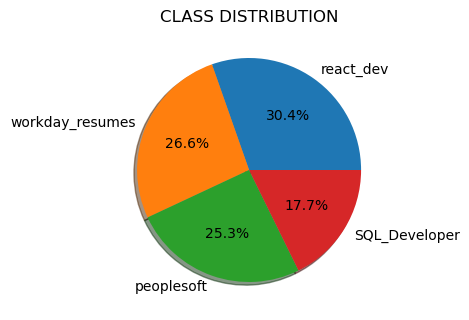

In [52]:
#Pie-chart
from matplotlib.gridspec import GridSpec

targetCounts = final_data['Category'].value_counts().reset_index()['Category']
targetLabels  = final_data['Category'].value_counts().reset_index()['index']

# Make square figures and axes
plt.figure(1, figsize=(8,8))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CLASS DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%',shadow=True,)

In [53]:
top_words = dict(word_counts.most_common(10))

In [54]:
# create a dataframe from the dictionary
df_top_words = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])


In [55]:
import seaborn as sns

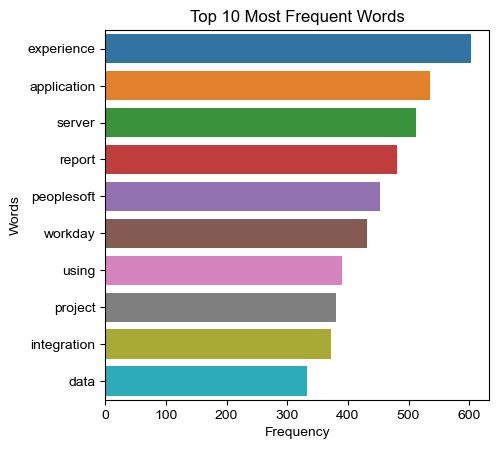

In [56]:
# create the bar plot
sns.barplot(x='Frequency', y='Word', data=df_top_words)

# set the title and axis labels
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

# adjust the gap between bars
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
plt.subplots_adjust(left=0.3)
plt.show()

In [57]:
#creating the wordcloud

In [58]:
#pip install wordcloud

In [59]:
from wordcloud import WordCloud

In [60]:
#using all combined text--> all_resume_text

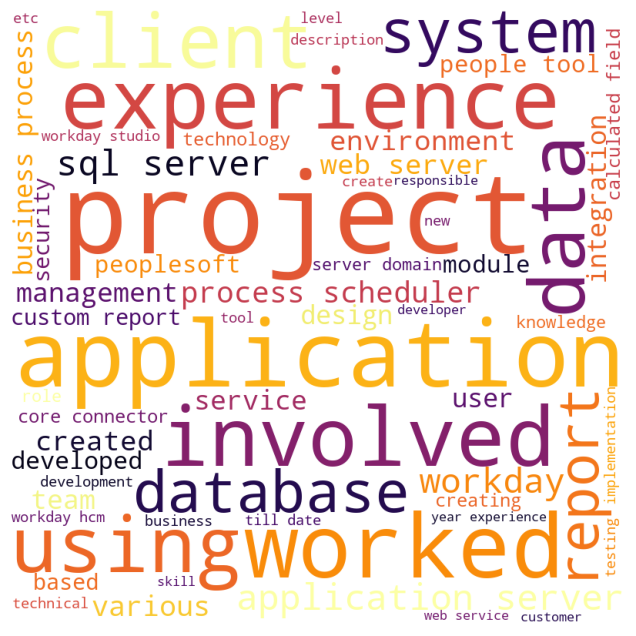

In [61]:
# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', max_words=60).generate(all_resume_text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [62]:
#trying to visualise each resume lengh of word and uniuqe word into it

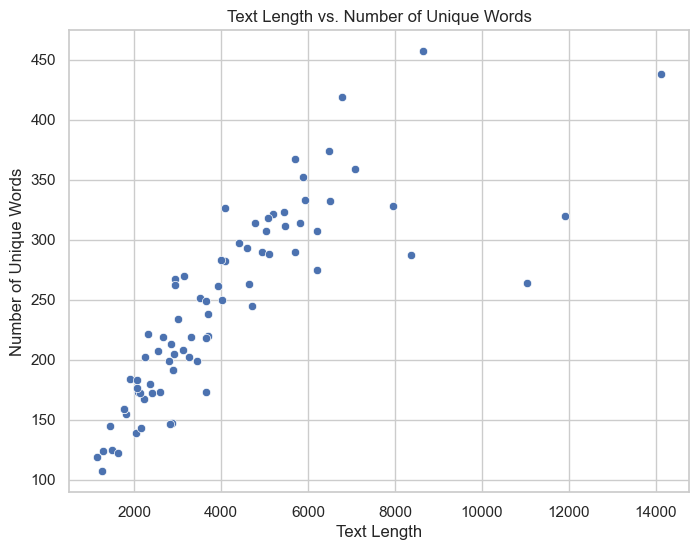

In [63]:
# Create scatter plot of the length of each text entry vs the number of unique words in that entry
final_data['text_length'] = final_data['clean_text'].apply(len)
final_data['unique_words'] = final_data['clean_text'].apply(lambda x: len(set(str(x).split())))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='unique_words', data=final_data)
plt.title('Text Length vs. Number of Unique Words')
plt.xlabel('Text Length')
plt.ylabel('Number of Unique Words')
plt.show()

# Model Building

In [64]:
#pip install keras

In [65]:
#pip install tensorflow

In [66]:
import keras

In [67]:
#pip install --upgrade keras tensorflow

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [69]:
final_data

,File Name,Text Data,Category,clean_text,text_length,unique_words
0,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...,4938,290
1,Gopi Krishna_Hexaware.docx,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...,3693,238
2,Hari Krishna M_Hexaware.docx,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...,6488,374
3,Harikrishna Akula_Hexaware.docx,Harikrishna Akula ...,workday_resumes,harikrishna akula summary year experience arou...,5688,367
4,Hima Mendu_Hexaware.docx,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...,2916,205
...,...,...,...,...,...,...
74,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,react_dev,khizaruddin rauf experience currently working ...,2143,172
75,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,react_dev,pranish sonone career summary experience year ...,1248,107
76,Reactjs Developer_Ranga Gaganam_Musquare Techn...,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_dev,ranga gaganam professional summary professiona...,2152,143
77,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_dev,shaik abdul sharuk year experience wipro caree...,2063,176


In [70]:
# Create a new dataset with only the 'clean_text' and 'data class' columns
resume=final_data.loc[:, ['clean_text', 'Category']]

In [71]:
resume.shape

(79, 2)

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
# Initialize the LabelEncoder
le = LabelEncoder()

In [74]:
# Fit and transform the 'class' column
resume['Category'] = le.fit_transform(resume['Category'])

In [75]:
resume

,clean_text,Category
0,chinna subbarayudu dob march nationality india...,3
1,name gopi krishna reddy professional summery w...,3
2,hari krishna summary result oriented professio...,3
3,harikrishna akula summary year experience arou...,3
4,hima mendu career objective continue growing k...,3
...,...,...
74,khizaruddin rauf experience currently working ...,2
75,pranish sonone career summary experience year ...,2
76,ranga gaganam professional summary professiona...,2
77,shaik abdul sharuk year experience wipro caree...,2


In [76]:
(resume.iloc[69]['clean_text'])

'kotani durga prasad objective aspirant position organization contribute skill organization success synchronize new technology resourceful innovative flexible professional summary year experience software engineer highly creative web designer front end developer experience working diverse range project small business website large scale website global user base excellent knowledge html html  bootstrap framework strong hand experience hand coding web technology good knowledge designing developing web page based seo search engine optimization standard cross browser compatibility good knowledge client side programming javascript jquery working knowledge react experience developing fully responsive website using medium query flexible layout ability create pixel pixel matching web page unmatchable degree creativity well technical production skill excellent verbal communication skill including ability convey idea information clearly concisely persuasively flexibility good judgment attention 

# SVM

In [77]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [78]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume['clean_text'], resume['Category'], test_size=0.2, random_state=42)

In [79]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [80]:
# Train the SVM model using the training data
svm_model_final = SVC(kernel='linear')
svm_model_final.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [81]:
# Use the trained SVM model to make predictions on the testing data
y_pred = svm_model_final.predict(X_test_tfidf)

In [82]:
# Evaluate the performance of the SVM model using metrics like accuracy, precision, recall, and F1 score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [83]:
# Set up a parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf','sigmoid'],
              'gamma': ['scale', 'auto']}

In [84]:
# Use GridSearchCV to find the best hyperparameters
svm_model = SVC()
svm_grid = GridSearchCV(svm_model, param_grid, cv=5)
svm_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [85]:
# Use the best hyperparameters to train the SVM model
best_svm_model = svm_grid.best_estimator_
best_svm_model.fit(X_train_tfidf, y_train)


SVC(C=1, kernel='linear')

In [86]:
# Use the trained SVM model to make predictions on the testing data
y_pred = best_svm_model.predict(X_test_tfidf)


In [87]:
# Evaluate the performance of the SVM model using metrics like accuracy, precision, recall, and F1 score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [88]:
# Compute the training accuracy
train_acc = best_svm_model.score(X_train_tfidf, y_train)

# Compute the testing accuracy
test_acc = best_svm_model.score(X_test_tfidf, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


# Randamforest

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Convert the text data into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [91]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# Evaluate the model on the testing set
y_pred = rf_model.predict(X_test_vect)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [93]:
# Compute the training accuracy
train_acc = rf_model.score(X_train_vect, y_train)

# Compute the testing accuracy
test_acc = rf_model.score(X_test_vect, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# Create a k-NN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

In [96]:
# Fit the model on the training data
knn_model.fit(X_train_vect, y_train)

KNeighborsClassifier()

In [97]:
# Compute the training accuracy
train_acc = knn_model.score(X_train_vect, y_train)

# Compute the testing accuracy
test_acc = knn_model.score(X_test_vect, y_test)

In [98]:
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9523809523809523
Testing accuracy: 0.875


# hyperprameter tunning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

In [101]:
# Create a k-NN model
knn_model = KNeighborsClassifier()

In [102]:
# Create a grid search object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

In [103]:
# Fit the grid search object on the training data
grid_search.fit(X_train_vect, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [104]:
# Print the best hyperparameter value and corresponding accuracy score
print("Best n_neighbors value:", grid_search.best_params_['n_neighbors'])
print("Best accuracy score:", grid_search.best_score_)

Best n_neighbors value: 3
Best accuracy score: 0.9358974358974359


In [105]:
# Create a k-NN model with the best hyperparameter value
knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

In [106]:
# Fit the model on the training data
knn_model.fit(X_train_vect, y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
# Compute the training accuracy
train_acc = knn_model.score(X_train_vect, y_train)

In [108]:
# Compute the testing accuracy
test_acc = knn_model.score(X_test_vect, y_test)

In [109]:
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9523809523809523
Testing accuracy: 0.9375


In [110]:
# Evaluate the model on the testing set
y_pred = knn_model.predict(X_test_vect)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9375
Precision: 0.953125
Recall: 0.9375
F1 score: 0.9384920634920635


# NB

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
# Create a Naive Bayes model
nb_model = MultinomialNB()

In [113]:
# Fit the model on the training data
nb_model.fit(X_train_vect, y_train)

MultinomialNB()

In [114]:
# Compute the training accuracy
train_acc = nb_model.score(X_train_vect, y_train)

In [115]:
# Compute the testing accuracy
test_acc = nb_model.score(X_test_vect, y_test)

In [116]:
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


In [117]:
# Evaluate the model on the testing set
y_pred =nb_model.predict(X_test_vect)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


# comparing all model accuracy

In [118]:
# Compute the training and testing accuracy for each model
svm_train_acc = best_svm_model.score(X_train_tfidf, y_train)
svm_test_acc = best_svm_model.score(X_test_tfidf, y_test)

rf_train_acc = rf_model.score(X_train_vect, y_train)
rf_test_acc = rf_model.score(X_test_vect, y_test)

knn_train_acc = knn_model.score(X_train_vect, y_train)
knn_test_acc = knn_model.score(X_test_vect, y_test)

nb_train_acc = nb_model.score(X_train_vect, y_train)
nb_test_acc = nb_model.score(X_test_vect, y_test)

In [119]:
# Print the results
print("SVM training accuracy:", svm_train_acc)
print("SVM testing accuracy:", svm_test_acc)

print("Random forest training accuracy:", rf_train_acc)
print("Random forest testing accuracy:", rf_test_acc)

print("k-NN training accuracy:", knn_train_acc)
print("k-NN testing accuracy:", knn_test_acc)

print("Naive Bayes training accuracy:", nb_train_acc)
print("Naive Bayes testing accuracy:", nb_test_acc)

SVM training accuracy: 1.0
SVM testing accuracy: 1.0
Random forest training accuracy: 1.0
Random forest testing accuracy: 1.0
k-NN training accuracy: 0.9523809523809523
k-NN testing accuracy: 0.9375
Naive Bayes training accuracy: 1.0
Naive Bayes testing accuracy: 1.0


In [120]:
import pickle
pickle.dump(svm_model_final, open('svm_model_final.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(skills_list, open('skills_list.pkl', 'wb'))
